In [1]:
# pip install nltk

In [2]:
# pip install wordcloud

In [3]:
#Import Packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import nltk
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pwd

'C:\\Data Science\\Jupyter Notebook\\GitHackathon\\Notebooks'

In [5]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [6]:
train.head(5)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [7]:
test.head(5)

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


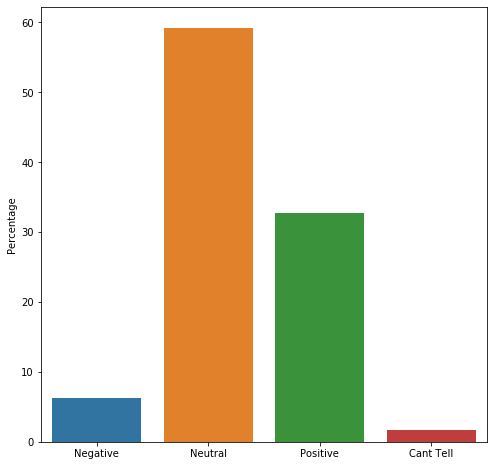

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = train.sentiment.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive', 'Cant Tell'])
ax.set_ylabel("Percentage")
plt.show()

In [9]:
counts = train.sentiment.value_counts()
print(counts)

print("\nPredicting only 2 = {:.2f}% accuracy".format(counts[2] / sum(counts) * 100))

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

Predicting only 2 = 32.75% accuracy


In [10]:
neg_tweets = train[train.sentiment == 0].tweet
nue_tweets = train[train.sentiment == 1].tweet
pos_tweets = train[train.sentiment == 2].tweet
ct_tweets = train[train.sentiment == 3].tweet

In [11]:
# StopWord Removal

#import nltk
#nltk.download('stopwords')

import string
import re
import nltk
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.tokenize import TweetTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import TextBlob

In [12]:
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 

In [13]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


In [14]:
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    nltk_tagged = nltk.pos_tag(tokenizer.tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
          if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
                #tweet = str(TextBlob(word).correct())                
                if tag is None:
                    #if there is no available tag, append the token as is
                    lemmatized_sentence.append(word)
                else:        
                    #else use the tag to lemmatize the token
                    lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)    
    

In [15]:
def clean_tweets(tweet):    
    # remove numbers
    tweet = tweet.lower()
    tweet = re.sub(r'\d+', '', tweet)
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    return lemmatize_sentence(tweet)

In [16]:
import nltk
# nltk.download('averaged_perceptron_tagger')

In [1]:
rTrain = train.copy()
#print(clean_tweets('I am loving it'))
rTrain['lemma_tweet'] = rTrain.apply(lambda row: clean_tweets(str(row['tweet'])), axis=1)

NameError: name 'train' is not defined

In [18]:
# rTrain = cTrain.copy()

freq = pd.Series(' '.join(rTrain['lemma_tweet']).split()).value_counts()[:10]
freq
freq = list(freq.index)
rTrain['lemma_tweet'] = rTrain['lemma_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

freq = pd.Series(' '.join(rTrain['lemma_tweet']).split()).value_counts()[-10:]
freq
freq = list(freq.index)
rTrain['lemma_tweet'] = rTrain['lemma_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
rTrain.head()

# rTrain.to_csv('../data/iter1/rTrain.csv') 



,tweet_id,tweet,sentiment,lemma_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui define language touch different dialec...
1,1851,Learning ab Google doodles! All doodles should...,1,learn ab doodle doodle light funny amp innovat...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex steal show yrs rt school mkt expert
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,app would b pretty awesome crash every min ext...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside austin wait


In [20]:
rTrain.iloc[1,1]

'Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw'

In [21]:
rTrain.iloc[1,3]

'learn ab doodle doodle light funny amp innovative exception significant occasion googledoodle'

In [22]:
print("Before Lemmatization and comon word removal :")
print(' ')
print(rTrain.iloc[1,1])
print(' ')
print('**********************************************************')
print(' ')
print('After removing common words and applying Lemmatization :')
print(' ')
print(rTrain.iloc[1,3])

Before Lemmatization and comon word removal :
 
Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
 
**********************************************************
 
After removing common words and applying Lemmatization :
 
learn ab doodle doodle light funny amp innovative exception significant occasion googledoodle


**Before Lemmatization and common words removal :**
 
Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
 
**********************************************************
 
**After removing common words and applying Lemmatization :**
 
learn ab doodle doodle light funny amp innovative exception significant occasion googledoodle
​

In [38]:
#cTrain.head(50)

#freq = pd.Series(' '.join(cTrain['lemma_tweet']).split()).value_counts()[:10]
#freq

# cTrain['sentiment_val'] = cTrain['lemma_tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
# cTrain[['tweet','sentiment','sentiment_val']].head()
# cTrain.to_csv('../data/iter1/cTrain.csv') 

In [39]:
# pip install textblob

In [40]:
rTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 4 columns):
tweet_id       7274 non-null int64
tweet          7273 non-null object
sentiment      7274 non-null int64
lemma_tweet    7274 non-null object
dtypes: int64(2), object(2)
memory usage: 227.4+ KB


# ................................................

In [41]:
#cTrain_org = cTrain.copy()
#cTrain = rTrain.copy()
cTrain = pd.read_csv('../data/iter/rTrain.csv')
cTrain.dropna(subset=['lemma_tweet'],inplace=True)
cTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7273
Data columns (total 6 columns):
Unnamed: 0       7271 non-null int64
tweet_id         7271 non-null int64
tweet            7271 non-null object
sentiment        7271 non-null int64
lemma_tweet      7271 non-null object
sentiment_val    7271 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 397.6+ KB


In [42]:
from sklearn.feature_extraction.text import CountVectorizer


bow = CountVectorizer(lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(cTrain['lemma_tweet'])
train_bow
  

<7271x7032 sparse matrix of type '<class 'numpy.int64'>'
	with 56731 stored elements in Compressed Sparse Row format>

In [44]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,1))
train_vect = tfidf.fit_transform(cTrain['lemma_tweet'])

train_vect

<7271x6880 sparse matrix of type '<class 'numpy.float64'>'
	with 50785 stored elements in Compressed Sparse Row format>

In [38]:
print(train_vect.shape, train_bow.shape, cTrain.shape)

(7271, 1000) (7271, 7032) (7271, 6)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sample,y_sample = smote.fit_sample(train_vector,train['sentiment'])

nb.fit(X_sample6,y_sample6)
smote_pred = pd.Series(nb.predict(test_vector))


In [45]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split  
X = train_bow
y = cTrain['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sample,y_sample = smote.fit_sample(X_train,y_train)

# text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
# text_classifier.fit(X_sample, y_sample) 
# predictions = text_classifier.predict(X_test)

lr = LogisticRegression()
lr.fit(X_sample,y_sample)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='weighted'))

[[ 35  32  17   1]
 [ 61 565 204  36]
 [ 20 177 262  18]
 [  3  14   7   3]]
              precision    recall  f1-score   support

           0       0.29      0.41      0.34        85
           1       0.72      0.65      0.68       866
           2       0.53      0.55      0.54       477
           3       0.05      0.11      0.07        27

    accuracy                           0.59      1455
   macro avg       0.40      0.43      0.41      1455
weighted avg       0.62      0.59      0.61      1455

0.5945017182130584
0.6056321742222062


In [48]:


def find_optimal_k(X_train,y_train, myList):
   
    # empty list that will hold cv scores
    cv_scores = []

    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.3)

    for i in myList:
        nb = MultinomialNB(alpha = i)
        model = nb.fit(X_tr, y_tr)

        # predict the response on the crossvalidation train
        pred = model.predict(X_cv)

        # evaluate CV accuracy
        acc = accuracy_score(y_cv, pred, normalize=True)
        cv_scores.append(acc)
        
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = myList[MSE.index(min(MSE))]
    print('\nThe optimal alpha is ', optimal_alpha)


    plt.figure(figsize=(10,6))
    plt.plot(myList,MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. alpha Value')
    plt.xlabel('alpha')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_alpha


The optimal alpha is  1e-05
the misclassification error for each k value is :  [0.472 0.472 0.472 0.473 0.473 0.473 0.473 0.473 0.473 0.473 0.473 0.473
 0.473 0.473 0.473 0.473 0.473 0.473 0.473 0.473]
[[ 37  21  20   7]
 [ 85 497 239  45]
 [ 68 153 238  18]
 [  5  10   9   3]]
              precision    recall  f1-score   support

           0       0.19      0.44      0.26        85
           1       0.73      0.57      0.64       866
           2       0.47      0.50      0.48       477
           3       0.04      0.11      0.06        27

    accuracy                           0.53      1455
   macro avg       0.36      0.40      0.36      1455
weighted avg       0.60      0.53      0.56      1455

0.5326460481099656


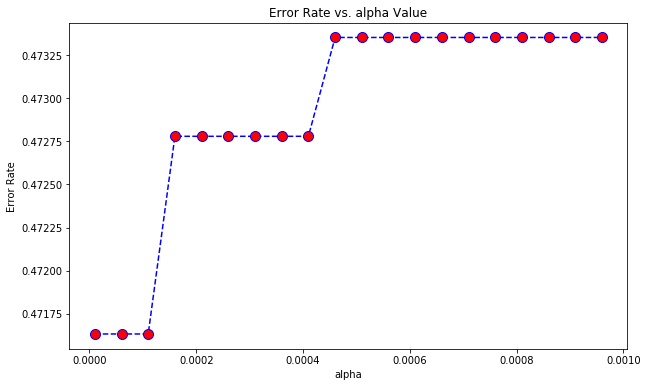

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

final_train_bow = StandardScaler(with_mean=False).fit_transform(train_bow)
X = final_train_bow
y = cTrain['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


myList = np.arange(0.00001, 0.001, 0.00005) #list(range(1,200))
optimal_alpha = find_optimal_k(X_train ,y_train,myList)

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(optimal_alpha)
model = nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

X = rTrain.lemma_tweet
y = rTrain.sentiment



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#x_train, x_test, y_train, y_test = train_test_split(rTrain, rTrain.lemma_tweet, test_size=0.33, random_state=42)

from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), digits=4))

(5819,) (5819,) (1455,) (1455,)
              precision    recall  f1-score   support

           0     0.6087    0.1538    0.2456        91
           1     0.6845    0.8542    0.7600       871
           2     0.5831    0.4264    0.4926       469
           3     0.5000    0.0417    0.0769        24

    accuracy                         0.6591      1455
   macro avg     0.5941    0.3690    0.3938      1455
weighted avg     0.6440    0.6591    0.6303      1455

